# MNIST

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices())

2023-10-02 22:00:05.184627: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-02 22:00:06.302669: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2023-10-02 22:00:07.946538: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-02 22:00:08.061913: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [2]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

import numpy as np
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [3]:
# convert class vectors to binary class matrices
# y_train = tf.keras.utils.to_categorical(y_train, num_classes)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# OPTIMIZER = lambda: tf.keras.optimizers.Adam(0.001)
OPTIMIZER = lambda: tf.keras.optimizers.SGD()

In [4]:
rvnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

rvnn_model.compile(
    optimizer=OPTIMIZER(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

rvnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
rvnn_history = rvnn_model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6512 - accuracy: 0.8356 - val_loss: 0.3597 - val_accuracy: 0.9024
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.9053 - val_loss: 0.2958 - val_accuracy: 0.9159
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.9175 - val_loss: 0.2643 - val_accuracy: 0.9260
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2627 - accuracy: 0.9260 - val_loss: 0.2412 - val_accuracy: 0.9331
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2393 - accuracy: 0.9332 - val_loss: 0.2218 - val_accuracy: 0.9367
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2201 - accuracy: 0.9383 - val_loss: 0.2036 - val_accuracy: 0.9422
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2040 - accuracy: 0.9433 - val_loss: 0.1933 - val_accuracy:

In [6]:
import numpy as np
from cvnn import layers

x_train_fourier = np.fft.fft2(x_train)
x_test_fourier = np.fft.fft2(x_test)

max_abs = np.abs(x_train_fourier).max()
train_fourier = x_train / max_abs
test_fourier = x_train / max_abs
print('max_abs:', max_abs)

max_abs: 20.0


In [7]:
cvnn_model = tf.keras.Sequential([
    layers.ComplexInput(input_shape=(28, 28,)),
    layers.ComplexFlatten(),
    layers.ComplexDense(64, activation='cart_relu'),
    layers.ComplexDense(10, activation='sigmoid_real'),
])

cvnn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cvnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_flatten (ComplexFl  (None, 784)               0         
 atten)                                                          
                                                                 
 complex_dense (ComplexDens  (None, 64)                100480    
 e)                                                              
                                                                 
 complex_dense_1 (ComplexDe  (None, 10)                1300      
 nse)                                                            
                                                                 
Total params: 101780 (397.58 KB)
Trainable params: 101780 (397.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
cvnn_history = rvnn_model.fit(
    x_train_fourier,
    y_train,
    epochs=10,
    validation_data=(x_test_fourier, y_test),
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4331 - accuracy: 0.8668 - val_loss: 0.2700 - val_accuracy: 0.9154
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2643 - accuracy: 0.9180 - val_loss: 0.2789 - val_accuracy: 0.9126
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2244 - accuracy: 0.9291 - val_loss: 0.2184 - val_accuracy: 0.9325
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2007 - accuracy: 0.9369 - val_loss: 0.2055 - val_accuracy: 0.9342
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1855 - accuracy: 0.9416 - val_loss: 0.1981 - val_accuracy: 0.9383
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1712 - accuracy: 0.9456 - val_loss: 0.1931 - val_accuracy: 0.9389
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1616 - accuracy: 0.9489 - val_loss: 0.1886 - val_accuracy:

## Comaprision

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
    
def make_dataframe(fit_history):
    df = pd.DataFrame(fit_history.history)
    df['epoch'] = fit_history.epoch
    return df

def plot_loss_history_comparision(rvnn_fit_history, cvnn_fit_history, scale_upper_bound = 1):
    
    rvnn_dataframe = make_dataframe(rvnn_fit_history)
    cvnn_dataframe = make_dataframe(cvnn_fit_history)
    
    upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, rvnn_dataframe['val_loss'].values, cvnn_dataframe['loss'].values, cvnn_dataframe['val_loss'].values)))
    # upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, cvnn_dataframe['loss'].values)))
    
    plt.figure()
    plt.ylim((0, scale_upper_bound*upper_bound))
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['loss'], label='CVNN training set')
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['val_loss'], linestyle='dashed', label='CVNN validation set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['loss'], label='RVNN training set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['val_loss'], linestyle='dashed', label='RVNN validation set')
    plt.legend(loc="lower left")
    plt.xlabel("epoch no.")
    plt.ylabel("loss value")
    plt.show()

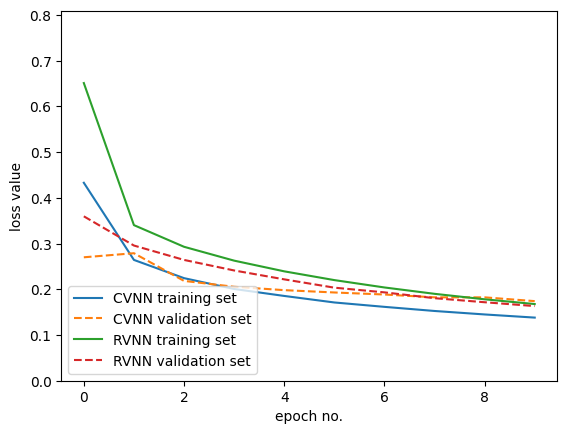

In [10]:
plot_loss_history_comparision(rvnn_history, cvnn_history, 2)